In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
match=pd.read_csv(r"F:\datasets\matches.csv")

In [4]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deli=pd.read_csv(r"F:\datasets\deliveries.csv")

# Exploratory data Analysis


In [6]:
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [7]:
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [8]:
match['team2'].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

In [9]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
match[match['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [11]:
match['winner'].fillna('Draw',inplace=True)

In [12]:
match[match['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [13]:
team_encode={
    'Mumbai Indians' : 1,
    'Kolkata Knight Riders' : 2,
    'Royal Challengers Bangalore' : 3,
    'Deccan Chargers' : 4,
    'Chennai Super Kings' : 5,
    'Rajasthan Royals' : 6,
    'Delhi Daredevils' : 7,
    'Gujarat Lions' : 8,
    'Kings XI Punjab' : 9,
    'Sunrisers Hyderabad' : 10,
    'Rising Pune Supergiants' : 11,
    'Rising Pune Supergiant' : 11,
    'Kochi Tuskers Kerala' : 12,
    'Pune Warriors' : 13,
    'Delhi Capitals' : 14,
    'Draw' : 15
}

In [14]:
team_dict={
    'team1':team_encode,
    'team2':team_encode,
    'toss_winner':team_encode,
    'winner':team_encode
}

match.replace(team_dict,inplace=True)
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [16]:
match[match['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [17]:
match['city'].fillna('Dubai',inplace=True)

In [18]:
match.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


# Match Win After Toss Win

In [19]:
toss_wins=match['toss_winner'].value_counts(sort=True)

In [20]:
toss_wins

1     98
2     92
5     89
9     81
3     81
7     80
6     80
10    46
4     43
13    20
8     15
11    13
14    10
12     8
Name: toss_winner, dtype: int64

In [21]:
match_wins=match['winner'].value_counts(sort=True)

In [22]:
match_wins

1     109
5     100
2      92
3      84
9      82
6      75
7      67
10     58
4      29
11     15
8      13
13     12
14     10
12      6
15      4
Name: winner, dtype: int64

In [23]:
for idx,val in toss_wins.iteritems():
    print(f"{list(team_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 98
Kolkata Knight Riders -> 92
Chennai Super Kings -> 89
Kings XI Punjab -> 81
Royal Challengers Bangalore -> 81
Delhi Daredevils -> 80
Rajasthan Royals -> 80
Sunrisers Hyderabad -> 46
Deccan Chargers -> 43
Kochi Tuskers Kerala -> 20
Gujarat Lions -> 15
Rising Pune Supergiants -> 13
Pune Warriors -> 10
Rising Pune Supergiant -> 8


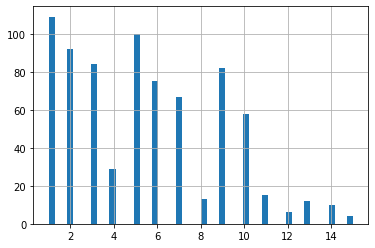

In [24]:
match['winner'].hist(bins=50)

In [25]:
team_dict

{'team1': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chennai Super Kings': 5,
  'Rajasthan Royals': 6,
  'Delhi Daredevils': 7,
  'Gujarat Lions': 8,
  'Kings XI Punjab': 9,
  'Sunrisers Hyderabad': 10,
  'Rising Pune Supergiants': 11,
  'Rising Pune Supergiant': 11,
  'Kochi Tuskers Kerala': 12,
  'Pune Warriors': 13,
  'Delhi Capitals': 14,
  'Draw': 15},
 'team2': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chennai Super Kings': 5,
  'Rajasthan Royals': 6,
  'Delhi Daredevils': 7,
  'Gujarat Lions': 8,
  'Kings XI Punjab': 9,
  'Sunrisers Hyderabad': 10,
  'Rising Pune Supergiants': 11,
  'Rising Pune Supergiant': 11,
  'Kochi Tuskers Kerala': 12,
  'Pune Warriors': 13,
  'Delhi Capitals': 14,
  'Draw': 15},
 'toss_winner': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chenn

Text(0.5, 1.0, 'Match Winners')

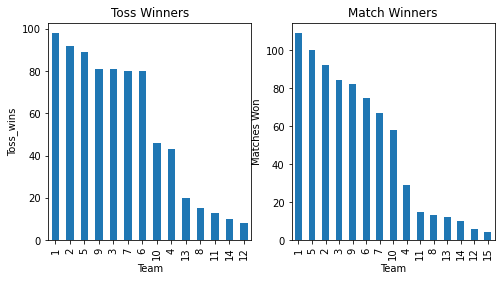

In [26]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Toss_wins')
ax1.set_title('Toss Winners')
toss_wins.plot(kind='bar')

ax2=fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Matches Won')
ax2.set_title("Match Winners")

In [27]:
match.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Dropping the Redundant Columns

In [28]:
match=match[['team1','team2','city','toss_winner','toss_decision','venue','winner']]

In [29]:
match

,team1,team2,city,toss_winner,toss_decision,venue,winner
0,10,3,Hyderabad,3,field,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,11,field,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,2,field,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,9,field,Holkar Cricket Stadium,9
4,3,7,Bangalore,3,bat,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,1,field,Wankhede Stadium,1
752,5,1,Chennai,5,bat,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,14,field,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,5,field,ACA-VDCA Stadium,5


In [30]:
from sklearn.preprocessing import LabelEncoder
ftr_list=['city','toss_decision','venue']
lr=LabelEncoder()

for ftr in ftr_list:
    match[ftr]=lr.fit_transform(match[ftr])
    print(lr.classes_)
match

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_winner,toss_decision,venue,winner
0,10,3,15,3,1,28,10
1,1,11,27,11,1,21,11
2,8,2,29,2,1,31,2
3,11,9,16,9,1,13,9
4,3,7,2,3,0,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,5,0,18,1
753,10,14,32,14,1,0,14
754,14,5,32,5,1,0,5


# Machine Learning

In [31]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(match,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_score(model,data,predictor,target):
    model.fit(data[predictor],data[target])
    pred=model.predict(data[predictor])
    acc_score=accuracy_score(pred,data[target])
    scores=cross_val_score(model,data[predictor],data[target],scoring='neg_mean_squared_error',cv=5)
    print(acc_score)
    print('Cross-Validation-Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE : {np.sqrt(-scores).mean()}')

In [33]:
#Logistic Regression
target_var=['winner']
pred_var=['team1','team2','venue','toss_winner','city','toss_decision']
model=LogisticRegression()
print_model_score(model,train_df,pred_var,target_var)

0.3211920529801324
Cross-Validation-Scores: [3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE : 3.555224332732571


In [34]:
#Random Forest Classifier

model=RandomForestClassifier(n_estimators=100)
print_model_score(model,train_df,pred_var,target_var)

0.8890728476821192
Cross-Validation-Scores: [3.58255645 3.68378174 3.50796025 3.47363149 3.85465087]
Average RMSE : 3.620516161031989


In [36]:
team1='Royal Challengers Bangalore'
team2='Sunrisers Hyderabad'
inp=[team_dict['team1'][team1],team_dict['team2'][team2],'8',team_dict['toss_winner'][toss_winner],'1','1']
inp=np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(f"The winner would be:{list(team_encode.keys())[list(team_dict['team1'].values()).index(output)]}")

[['1' '10' '14' '10' '2' '1']]
The winner would be:Sunrisers Hyderabad


In [44]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp=[team_dict['team1'][team1],team_dict['team2'][team2],'14',team_dict['toss_winner'][toss_winner],'2','1']
inp=np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(f"The winner would be:{list(team_encode.keys())[list(team_dict['team1'].values()).index(output)]}")

[['1' '10' '14' '10' '2' '1']]
The winner would be:Sunrisers Hyderabad


In [ ]:
pd.Series(index=pred_var,data=model.feature_importances_)

In [ ]:
import seaborn as sns
team1=team_encode['Mumbai Indians']
team2=team_encode['Chennai Super Kings']
mtemp=match[]